# Catedra 14

## Ecuaciones Diferenciales Parciales

## Ecuaciones cuasi-lineales de segundo orden

$$
A(x, t) = \frac{\partial^2 u}{\partial x^2} + B(x,t)\frac{\partial^2 u}{\partial x\partial t} + C(x, t)\frac{\partial^2 u}{\partial t^2} = F\left(x,t, u, \frac{\partial u}{\partial x}, \frac{\partial u}{\partial t}\right)
$$

Se usara la convencion $u_x = \frac{\partial u}{\partial x}$

## Algunos casos tipicos
1. $B = C = 0 \rightarrow u_{xx}A = F$
 - Ejemplo $u_{xx} = Du_t$ Ecuacion de difusion. Es una ecuacion parabolica: $B^2 - 4AC = 0$
2. $B = 0,\,\, A,C < 0 \rightarrow A u_{xx} + C u_{tt} = F$
 - Ejemplo $u_{xx} = c^2u_{tt}$ Ecuacion de onda. Es una ecuacion hiperbolica: $B^2 - 4AC > 0$
3. Elipticas $B^2 - 4AC < 0$
 - Ejemplo $\nabla^2u = 0$ Ecuacion de Laplace
 - En 2D $\rightarrow \dfrac{\partial^2u}{\partial x^2} + \dfrac{\partial^2u}{\partial y^2} = -4\pi G \rho(x, y)$. Poisson.

### Condiciones de Borde.
Para resolver las ecuaciones de derivadas parciales es necesario conocer las condiciones de borde del problema, por ejemplo, en el caso de la cuerda, es necesario conocer la forma de la cuerda en todos los puntos para un tiempo determinado:

$$\begin{matrix}
u_{xx} = c^2u_{tt} \\ \\
u(x, t=0) = y(x) \\ \\
u(x=0, t) = a \\ \\
u(x=L, t) = b\end{matrix}$$

Otro ejemplo: Ecuacion de Poisson $\nabla^2 \Phi = G(x,y)$

$
\Phi\left(\Gamma\right) = \left[g_1(x,y)\right]_{(x,y)\in\Gamma} \rightarrow
$
Condicion de borde rigida (Dirichlet)

### Otra opcion para Poisson

$
\left(\dfrac{\partial\Phi}{\partial n}\right)_{\Gamma} \equiv \left(\hat{n}\cdot\nabla\Phi\right)_{\Gamma} = \left[g_2(x,y)\right]_{(x,y) \in \Gamma} \rightarrow
$ Condicion de borde tipo Neumann

### Ecuaciones Elipticas
Para la ecuacion de Poisson. Se recurre a la definicion de la accion *:o*

$$
S[\phi] = \int dxdy \left[\frac{1}{2} \left(\nabla\phi\right)^2 + \phi G\right]
$$

Se busca $\phi$ tal que minimiza $S[\phi] \rightarrow \delta S[\phi] = 0 \leftrightarrow \nabla^2\phi = G$

(Condicion de borde rigida)

$$\int dxdy \left[\nabla\phi\nabla(\delta\phi) + \delta\phi G\right] \implies \delta S = \int dxdy [-\nabla^2\phi + G]\delta\phi = 0 \implies G = \nabla^2\phi$$

Demostracion proximamente

De modo mas general:

$$\begin{matrix}
S[\phi] = \int dxdy\left[\frac{1}{2}\rho(x, y)(\nabla\phi)^2 + F(\phi)\right] \\ \\
\delta S = 0 \implies \nabla(\rho\nabla\phi)-\dfrac{\delta F}{\delta\phi} = 0
\end{matrix}$$

Por ejemplo, si $F(\phi) = -\frac{1}{2}q\phi^2-\phi G \implies \nabla(\rho(x,y)\nabla\phi + q(x,y)\phi(x,y) = G(x,y)
$

### Discretizacion de S

dibujo

Notacion
$\phi_{i,j} = \phi(x_i,y_j)$

$x_i = x_0 + ih$

$y_j = y_0 + jh$

Ej: Discretizacion de Poisson

$\nabla^2\phi = \phi_{xx} + \phi_{yy} = G(x,y)$

$\phi_{xx} = \dfrac{1}{h^2}(\phi_{i+1, k} - 2\phi_{i,k} + \phi_{i+1, k})$

$\dfrac{\phi_{i+1,k} - 2\phi_{i,k} + \phi_{i-1,k}}{h^2} + \dfrac{\phi_{i,k+1} - 2\phi_{i,k} + \phi_{i,k-1}}{h^2} = G_{i,k}$

$\phi_{i,k} = \frac{1}{4}\left[\phi_{i+1, k} + \phi_{i-1, k} + \phi_{i, k+1} + \phi_{i, k-1} - h^2G_{i,k}\right]$

## Metodo de la Relajacion

Es un metodo iterativo, relacion de recurrencia

![title](../img/grilla.png "Se recorre el dominio muchas veces hasta lograr convergencia.")

Se recorre el dominio hasta lograr convergencia, pues en principio solo se conoce el borde.
$\rightarrow$ Se coloca una adivinanza y luego se itera.

## Metodo de sobre-relajacion (acelera la convergencia)

$\phi_{i,k} = (1-\omega)\phi_{i,k} + \dfrac{\omega}{4}\left[\phi_{i+1, k} + \phi_{i-1, k} + \phi_{i, k+1} + \phi_{i, k-1} - h^2G_{i,k}\right]$

Con $\omega=1$ se recupera el metodo de relajacion.

Con $\omega\in\left[1,2\right]$ converhe mas rapido. (Los valores $1.2$ y $1.4$ son recomendados.

Se asignan valores al borde de la grilla y 0 a los otros puntos, luego se itera sin tocar los bordes (dado que estos son fijos)

**Nunca se deben tocar los bordes mas que para referencia, en caso de tener bordes rigidos.**

## Para condicion de borde tipo Neumann

$$\frac{\partial\phi}{\partial n} = [g(x,y)]_{\Gamma}$$

$$\begin{matrix}
\frac{\phi_{i,N} - \phi_{i, N-1}}{h} = g_{i,N} \\ \\
\implies \phi_{i,N} = \phi_{i, N-1} + hg_{i,N}
\end{matrix}$$

# Catedra 15

## Problema:

$$\begin{matrix}
-\nabla^2\phi = q \\
q = 2(2-x^2-y^2)
\end{matrix}$$

Condiciones de borde:
$$\begin{matrix}
\phi(\pm1, y) = 0 \\
\phi(x, \pm1) = 0
\end{matrix}$$

In [1]:
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


100


<IPython.core.display.Javascript object>


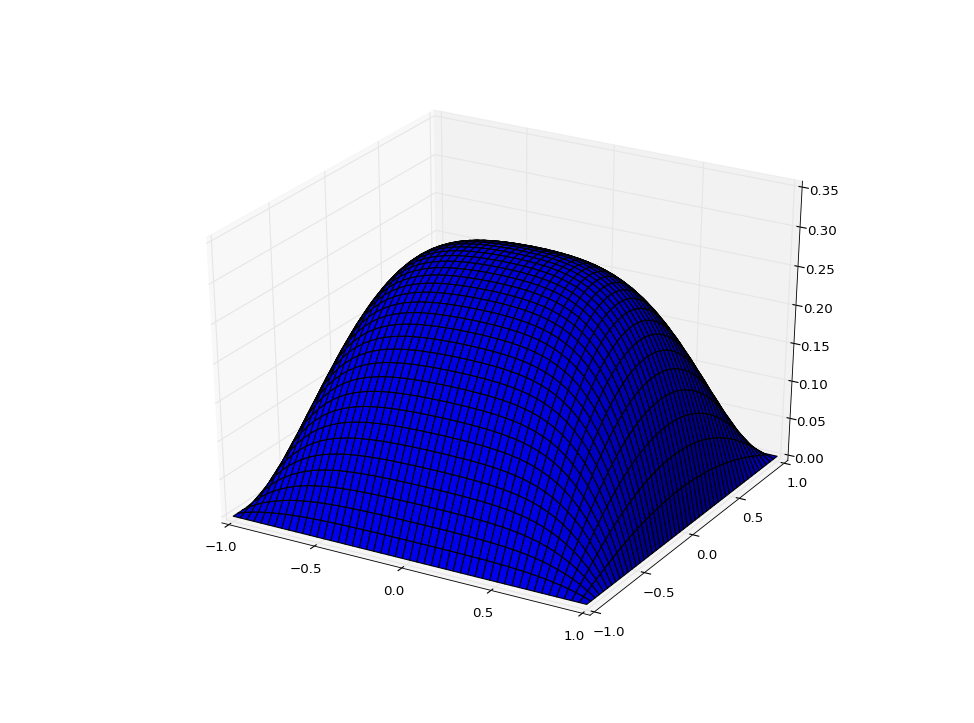

In [2]:
# Setup
LX = 2.  # Largo x de la grilla.
LY = 2.  # Largo y de la grilla.
Np = 50  # Numero de puntos a evaluar.
h = LX / (Np - 1)  # Paso de integracion.
w = 1.
N_iteraciones = 100  # Numero de iteraciones para el algoritmo.
eps = 1e-6  # Criterio de convergencia para el algoritmo.

phi = sp.zeros((Np,Np))
phi_next = sp.zeros_like(phi)

def q(i, j, h):
    """La carga de la ecuacion de Poisson"""
    x = i * h - LX / 2.
    y = i * h - LY / 2.
    output = 2 * (2 - x**2 - y**2)
    return output


def paso(phi, phi_next, h, w, q):
    """
    Implementacion del metodo de relajacion para el problema.
    No retorna, si no que modifica phi_next.
    """
    for i in range(1, Np - 1):
        for j in range(1, Np - 1):
            phi_next[i, j] = (
                (1 - w) * phi[i, j] + w / 4. * (
                    phi[i + 1, j] + phi_next[i - 1, j] +
                    phi_next[i, j - 1] + phi[i, j + 1] +
                    h**2 * q(i, j, h)
                )
            )
    pass


def no_hay_convergencia(phi, phi_next, eps):
    """Verifica si hay convergencia en el algoritmo."""
    nonzero = phi_next != 0
    dif_relativa = sp.fabs((phi_next - phi)[nonzero] / phi_next[nonzero])
    max_dif = max(dif_relativa)
    output = max_dif > eps
    return output

"""
Resolucion del problema.
"""

contador = 0
paso(phi, phi_next, h, w, q)
while contador < N_iteraciones and no_hay_convergencia(phi, phi_next, eps):
    phi = phi_next.copy()
    paso(phi, phi_next, h, w, q)
    contador += 1
    
print(contador)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

x = sp.linspace(-1, 1, Np)
y = sp.linspace(-1 ,1, Np)

X, Y = sp.meshgrid(x, y)

ax.plot_surface(X, Y, phi_next, rstride=1, cstride=1)
fig.show()